#  پروژه صفر هوش مصنوعی
## معرفی مجموعه داده
فایل **deposit_term_bank.csv** در کنار صورت پروژه قرار گرفته است؛ که برای پیش‌بینی اینکه آیا مشتری برای
کمپین سپرده مدتدار در یک موسسه بانکی مشترک می‌شود یا خیر، استفاده می‌شود. در هر سطر از این فایل یک
رکورد مربوط به یک کاربر آمده است که اطلاعات زیر را نشان می‌دهد.

+ سن مشتری  
+ وضعیت کاری مشتری  
+ وضعیت تاهل مشتری  
+ تحصیلات مشتری  
+ میانگین موجودی حساب سالانه مشتری  
+ آیا مشتری وام مسکن دارد یا خیر؟  
+ آیا مشتری وام شخصی دارد یا خیر؟  
+ مدت زمان آخرین تماس مشتری با بانک برحسب ثانیه  
+ تعداد تماس‌های برقرارشده با مشتری در طول این کمپین  
+ تعداد روزهایی که پس از آخرین تماس با مشتری از کمپین قبلی گذشته است  
+ نتیجه کمپین بازاریابی قبلی برای مشتری  
+ آیا مشتری سپرده مدت‌دار را ثبت کرده‌است یا خیر؟ (ستون هدف)  

برای تعداد کمی از کاربرها مقدار ستون هدف موجود نیست. در این پروژه میخواهیم این مقادیر را با استفاده از یک
مدل آماری ساده پیش‌بینی کنیم. برای ساخت این مدل از سایر نمونه‌ها (که مقدار ستون هدف آنها موجود است)
استفاده می‌کنیم.

1.  در این قسمت ابتدا کتابخانه pandas را import می‌کنیم و سپس بوسیله تابع read_csv از این کتابخانه، محتوای فایل csv را در یک dataframe ذخیره می‌کنیم.

In [2]:
import pandas as pd
dataFrame = pd.read_csv('bank_term_deposit.csv')

  حال به کمک متد‌های head ، tail و describe اطلاعات مربوط به این داده ها را نشان می‌دهیم. 

خروجی متد **describe** در ادامه آمده است:

In [3]:
dataFrame.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


تابع ()describe جزئیات آماری متداولی مانند میانگین، انحراف معیار، عنصر حداقل، عنصر حداکثر و دیگر جزئیات را ارائه می‌کند. این تابع راهکار خوبی برای کسب اطلاعات سریع و کلی پیرامون داده‌هایی محسوب می‌شود که کاربر در حال کار با آن‌ها است؛ به ویژه اگر پیرامون این داده‌ها اطلاعات زیادی نداشته باشد. همچنین، راهکار خوبی برای مقایسه سریع دو مجموعه داده مجزا که حاوی داده‌های مشابهی هستند، محسوب می‌شود.

خروجی متد **tail** در ادامه آمده است: 

In [4]:
dataFrame.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


خروجی متد tail(n=5) درواقع n سطر انتهای DataFrame را نمایش می‌دهد برای کم یا زیاد کردن تعداد این سطرها کافیست مقدار n را مقدار دلخواه قرار‌دهیم اگر n  را به متد ارسال نکنیم به طور پیش فرض هم مقدار آن 5 می باشد.

خروجی متد **head** در ادامه آمده است:

In [5]:
dataFrame.head(n=5)

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


خروجی متد head(n=5) درواقع n سطر ابتدای DataFrame را نمایش می‌دهد برای کم یا زیاد کردن تعداد این سطرها کافیست مقدار n را مقدار دلخواه قرار‌دهیم اگر n  را به متد ارسال نکنیم به طور پیش فرض هم مقدار آن 5 می باشد. 

2.  متد کاربردی دیگر دریافت اطلاعاتی کلی راجع به داده هایتان است. این کار با متد ()info انجام می شود:

In [6]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


یکی از مثال های ساده کاربرد info زمانی است که داده هایی را وارد pandas کرده اید. داده های شما در ظاهر کاملا عددی است اما زمانی که عملیاتی را روی آن ها انجام می دهد خطای unsupported operand را دریافت می کنید. قدم اول برای حل این مسئله استفاده از تابع info است تا بتوانید نوع داده های جدول خود را مشاهده کنید. معمولا زمانی که افراد خطای unsupported operand می گیرند، متوجه می شوند که داده هایشان در واقع رشته ای بوده است اما از آنجایی که درون رشته ها عدد می باشد تصور کرده اند که داده ها عددی است.

برای پردازش ستونهای غیر عددی، یکی از راههای ممکن برچسبگذاری است؛ به صورتی که هر کدام از دستهها با یک عدد جایگزین شوند.برای مثال در این مجموعه داده، ستونی دستهای با نام marital وجود دارد که شامل مقادیر divorced, single و married میباشد.در فراخوانی متد replace مقادیر این ستون را به گونه‌ای تغییر داده‌ایم که هر کدام از این مدل‌ها به یکی از اعداد بازه‌ی [2,0] نگاشت است.

In [7]:
maritalLabel = {"marital":{"divorced":0, "single":1, "married":2}}
dataFrame = dataFrame.replace(maritalLabel)
dataFrame.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,2.0,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,2.0,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,1.0,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,2.0,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,2.0,secondary,NaN,yes,no,226.0,1,-1,unknown,no


3.  مقدار بعضی از ستونهای بعضی سطرها، NaN است که معمولاً این مشکل در داده‌ها وجود دارد. pandas مقادیری که خالی باشند را با NaN نشان میدهد. حال با استفاده از همین کتابخانه و با فراخوانی متد ()isna و پس از آن متد sum تعداد سطرهایی را که مقدار آن ستون برای آنها خالی است را بدست آورده ایم.

In [8]:
dataFrame.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

  برای هر ستون سطرهایی را که مقدار آن ستون برای آنها خالی است را با مقدار یانگین همان ستون، جایگزین کرده ایم.

In [9]:
ageMean = dataFrame[dataFrame['y'].notna()]['age'].mean()
must_filled = dataFrame[dataFrame['y'].notna()]['age'].isna()
dataFrame.loc[must_filled[must_filled].index,'age'] = ageMean
dataFrame.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0000,unemployed,2.0,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0000,services,2.0,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,41.6241,management,1.0,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0000,management,2.0,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0000,blue-collar,2.0,secondary,NaN,yes,no,226.0,1,-1,unknown,no


  مقادیری در ستون balance که NAN بودند با مقدار میانگین جایگزین شده‌اند.

In [10]:
dataFrame.isna().sum()

age           60
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [11]:
balanceMean = dataFrame[dataFrame['y'].notna()]['balance'].mean()
must_filled = dataFrame[dataFrame['y'].notna()]['balance'].isna()
dataFrame.loc[must_filled[must_filled].index,'balance'] = balanceMean
dataFrame.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0000,unemployed,2.0,primary,1787.000000,no,no,79.0,1,-1,unknown,no
1,33.0000,services,2.0,secondary,4789.000000,yes,yes,NaN,1,339,failure,no
2,41.6241,management,1.0,tertiary,135.000000,yes,no,185.0,1,330,failure,no
3,30.0000,management,2.0,tertiary,1476.000000,yes,yes,199.0,4,-1,unknown,no
4,59.0000,blue-collar,2.0,secondary,1119.537991,yes,no,226.0,1,-1,unknown,no


  مقادیری در ستون duration که NAN بودند با مقدار میانگین جایگزین شده‌اند.

In [12]:
dataFrame.isna().sum()

age           60
job            0
marital      120
education      0
balance       34
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [13]:
durationMean = dataFrame[dataFrame['y'].notna()]['duration'].mean()
must_filled = dataFrame[dataFrame['y'].notna()]['duration'].isna()
dataFrame.loc[must_filled[must_filled].index,'duration'] = durationMean
dataFrame.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0000,unemployed,2.0,primary,1787.000000,no,no,79.000000,1,-1,unknown,no
1,33.0000,services,2.0,secondary,4789.000000,yes,yes,266.086858,1,339,failure,no
2,41.6241,management,1.0,tertiary,135.000000,yes,no,185.000000,1,330,failure,no
3,30.0000,management,2.0,tertiary,1476.000000,yes,yes,199.000000,4,-1,unknown,no
4,59.0000,blue-collar,2.0,secondary,1119.537991,yes,no,226.000000,1,-1,unknown,no


In [14]:
dataFrame.isna().sum()

age           60
job            0
marital      120
education      0
balance       34
housing      219
loan           0
duration      18
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

In [15]:
dataFrame.describe()

,age,marital,balance,duration,campaign,pdays
count,4461.000000,4401.000000,4487.000000,4503.000000,4521.000000,4521.000000
mean,41.618179,1.503522,1135.511204,264.758825,2.793630,39.766645
std,10.108215,0.694818,2626.229595,257.701392,3.109807,100.121124
min,19.000000,0.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,33.000000,1.000000,69.000000,106.000000,1.000000,-1.000000
50%,41.624100,2.000000,376.000000,192.000000,2.000000,-1.000000
75%,48.000000,2.000000,1119.537991,325.500000,3.000000,-1.000000
max,87.000000,2.000000,71188.000000,3025.000000,50.000000,871.000000


  در اینجا ابتدا به کمک تابع mean میانگین هر ستون را محاسبه کردیم و سپس با استفاده از تابع fillna مقادیر NaN را با میانگین ستون موردنظر جایگزین کرده‌دیم.

باتوجه به داده ها استفاده از میانگین میتواند مناسب و یا نامناسب باشد. درصورت وجود داده های پرت و بدلیل تاثیرگذاری زیاد این داده ها بروی میانگین، این روش مناسب نخواهد بود.

همچنین با اجرای دوباره تابع describe مشاهده میکنیم که جایگزینی میانگین باعث تغییر در مقادیر انحراف معیار و چارکها برای دو ستون age ، campaign و balance شده است.

  حال ابتدا سطرهایی که مقادیر قیمت برای آنها NaN است را در یک دیتافریم دیگر ذخیره میکنیم و پس از آن با استفاده از تابع dropna این سطرها را از دیتافریم اصلی حذف می‌کنیم.

In [16]:
df = dataFrame[dataFrame["y"].isna()]
dataFrame = dataFrame.dropna()

4.  با فراخوانی تابع value_counts از کتابخانه pandas  تعداد کاربرانی که وام خانه دارند به کمک دستور زیر بدست می آید.

In [17]:
dataFrame["housing"].value_counts()

yes    2128
no     1659
Name: housing, dtype: int64

  با فراخوانی تابع value_counts از کتابخانه pandas  تعداد کاربرانی که سپرده مدت‌دار را ثبت کرده‌اند به کمک دستور زیر بدست می‌آید.

In [18]:
dataFrame["y"].value_counts()

no     3360
yes     427
Name: y, dtype: int64

5.  تعداد کاربران بالای ۳۵ سال با وضعیت تاهل مجرد که نتیجه کمپین بازاریابی قبلی برای آنها موفقیتآمیز بوده است به کمک دستور زیر بدست می‌آید.

In [19]:
((dataFrame["age"] > 35) & (dataFrame["marital"] == 1) & (dataFrame["poutcome"] == "success")).sum()

14

6.  میانگین موجودی حساب سالانه مشتریانی که وضعیت تحصیل secondary دارند با کمک دستور زیر بدست می‌آید.

In [20]:
secMean = dataFrame[dataFrame["education"] == "secondary"]["balance"].mean()
secMean

952.68422111853

در این قسمت بدون حلقه for و به کمک کتابخانه time زمان اجرا این قطعه کد را محاسبه می‌کنیم.

In [21]:
import time
tic = time.time()

secMean = dataFrame[dataFrame["education"] == "secondary"]["balance"].mean()

toc = time.time()
print("mean:", secMean)
print("time: %f ms" % ((toc - tic)*1000))

mean: 952.68422111853
time: 2.996445 ms


7.  در این مرحله، محاسبات قسمت 6  را با استفاده از حلقه for انجام میدهیم و مشاهده میکنیم که زمان انجام این کار نسبت به حالت vectorization افزایش می‌ابد.

In [22]:
tic = time.time()

secondary = 0
balanceSum = 0

for row in dataFrame.iterrows():
    if row[1]["education"] == "secondary":
        balanceSum += row[1]["balance"]
        secondary += 1
secMean = balanceSum / secondary

toc = time.time()
print("mean:", secMean)
print("time: %f ms" % ((toc - tic)*1000))

mean: 952.68422111853
time: 339.788675 ms


8.  در این قسمت به کمک تابع hist در کتابخانه pandas نمودار توزیع ستونهای عددی را رسم می‌کنیم.

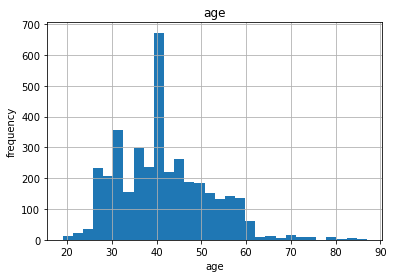

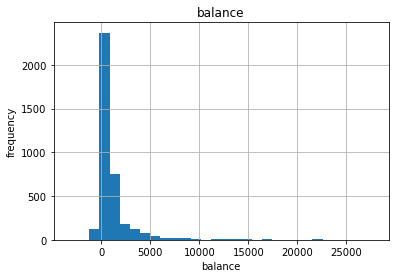

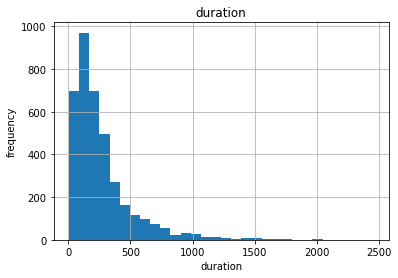

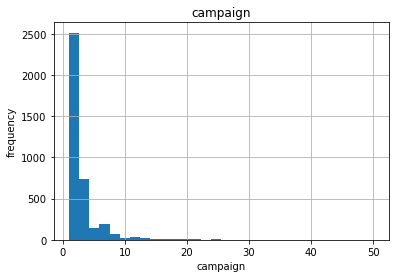

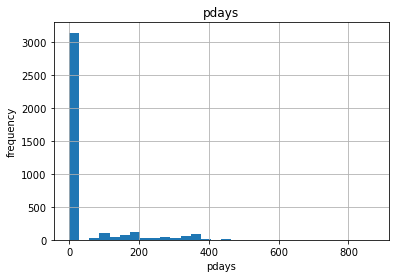

In [23]:
age = dataFrame.hist(column="age",bins=30)
for i in age[0]:
    i.set_xlabel("age")
    i.set_ylabel("frequency")

balance = dataFrame.hist(column="balance",bins=30)
for i in balance[0]:
    i.set_xlabel("balance")
    i.set_ylabel("frequency")    

duration = dataFrame.hist(column="duration",bins=30)
for i in duration[0]:
    i.set_xlabel("duration")
    i.set_ylabel("frequency")
    
campaign = dataFrame.hist(column="campaign",bins=30)
for i in campaign[0]:
    i.set_xlabel("campaign")
    i.set_ylabel("frequency")
    
pdays = dataFrame.hist(column="pdays",bins=30)
for i in pdays[0]:
    i.set_xlabel("pdays")
    i.set_ylabel("frequency")

9.  یکی از راههای بهبود دادهها برای مدلهای یادگیری ماشین، نرمالسازی داده‌هاست. برای تمام ستونها، نرمال سازی را با کم کردن میانگین و تقسیم کردن بر انحراف‌معیار انجام داده ایم.

In [24]:
dataFrame["age"] = (dataFrame["age"] - dataFrame["age"].mean())/dataFrame["age"].std()

dataFrame["balance"] = (dataFrame["balance"] - dataFrame["balance"].mean())/dataFrame["balance"].std()

dataFrame["duration"] = (dataFrame["duration"] - dataFrame["duration"].mean())/dataFrame["duration"].std()

dataFrame["campaign"] = (dataFrame["campaign"] - dataFrame["campaign"].mean())/dataFrame["campaign"].std()

dataFrame["pdays"] = (dataFrame["pdays"] - dataFrame["pdays"].mean())/dataFrame["pdays"].std()

dataFrame.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,-1.156484,unemployed,2.0,primary,0.288618,no,no,-0.732398,-0.575804,-0.399719,unknown,no
1,-0.860327,services,2.0,secondary,1.562681,yes,yes,0.004402,-0.575804,3.096044,failure,no
2,-0.008964,management,1.0,tertiary,-0.412499,yes,no,-0.314941,-0.575804,3.003509,failure,no
3,-1.156484,management,2.0,tertiary,0.156628,yes,yes,-0.259805,0.389477,-0.399719,unknown,no
4,1.706368,blue-collar,2.0,secondary,0.005344,yes,no,-0.153471,-0.575804,-0.399719,unknown,no


10.  تابع چگالی احتمال توزیع نرمال ویژگی age:

In [25]:
ageMeanYes = dataFrame[dataFrame['y'] == 'yes']['age'].mean()
ageStdYes = dataFrame[dataFrame['y'] == 'yes']['age'].std()
print("mean:", ageMeanYes)
print("std:" , ageStdYes)

mean: 0.13968340202267962
std: 1.2495342983113475


In [26]:
ageMeanNo = dataFrame[dataFrame['y'] == 'no']['age'].mean()
ageStdNo = dataFrame[dataFrame['y'] == 'no']['age'].std()
print("mean:", ageMeanNo)
print("std:" , ageStdNo)

mean: -0.017751432340399984
std: 0.9624508367653232


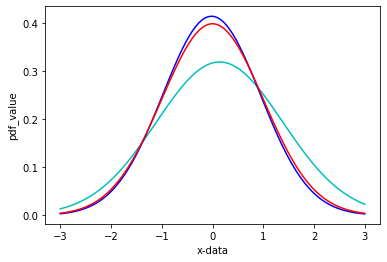

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

x = np.linspace(-3,3,100)

yes_pdf_values = stats.norm.pdf(x,loc=ageMeanYes,scale=ageStdYes)
no_pdf_values = stats.norm.pdf(x,loc=ageMeanNo,scale=ageStdNo)
true_pdf_values = stats.norm.pdf(x,loc=0,scale=1)

plt.plot(x,yes_pdf_values,'c')
plt.plot(x,no_pdf_values,'b')
plt.plot(x,true_pdf_values,'r')
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.show()

  تابع چگالی احتمال توزیع نرمال ویژگی duration:

In [28]:
durationMeanYes = dataFrame[dataFrame['y'] == 'yes']['duration'].mean()
durationStdYes = dataFrame[dataFrame['y'] == 'yes']['duration'].std()
print("mean:", durationMeanYes)
print("std:" , durationStdYes)

mean: 1.0999706727614935
std: 1.4856389470030953


In [29]:
durationMeanNo = dataFrame[dataFrame['y'] == 'no']['duration'].mean()
durationStdNo = dataFrame[dataFrame['y'] == 'no']['duration'].std()
print("mean:", durationMeanNo)
print("std:" , durationStdNo)

mean: -0.13978793966344086
std: 0.8208844540071907


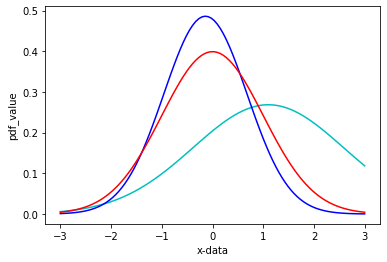

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

x = np.linspace(-3,3,100)

yes_pdf_values = stats.norm.pdf(x,loc=durationMeanYes,scale=durationStdYes)
no_pdf_values = stats.norm.pdf(x,loc=durationMeanNo,scale=durationStdNo)
true_pdf_values = stats.norm.pdf(x,loc=0,scale=1)

plt.plot(x,yes_pdf_values,'c')
plt.plot(x,no_pdf_values,'b')
plt.plot(x,true_pdf_values,'r')
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.show()

  تابع چگالی احتمال توزیع نرمال ویژگی balance:

In [31]:
balanceMeanYes = dataFrame[dataFrame['y'] == 'yes']['balance'].mean()
balanceStdYes = dataFrame[dataFrame['y'] == 'yes']['balance'].std()
print("mean:", balanceMeanYes)
print("std:" , balanceStdYes)

mean: 0.047147602749085006
std: 0.9110362153983889


In [32]:
balanceMeanNo = dataFrame[dataFrame['y'] == 'no']['balance'].mean()
balanceStdNo = dataFrame[dataFrame['y'] == 'no']['balance'].std()
print("mean:", balanceMeanNo)
print("std:" , balanceStdNo)

mean: -0.005991674516033025
std: 1.0107130444449965


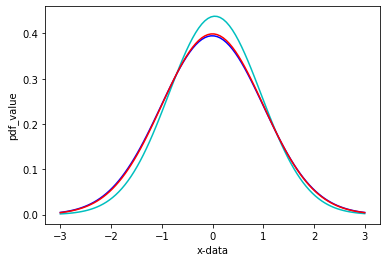

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

x = np.linspace(-3,3,100)

yes_pdf_values = stats.norm.pdf(x,loc=balanceMeanYes,scale=balanceStdYes)
no_pdf_values = stats.norm.pdf(x,loc=balanceMeanNo,scale=balanceStdNo)
true_pdf_values = stats.norm.pdf(x,loc=0,scale=1)

plt.plot(x,yes_pdf_values,'c')
plt.plot(x,no_pdf_values,'b')
plt.plot(x,true_pdf_values,'r')
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.show()

  تابع چگالی احتمال توزیع نرمال ویژگی campaign:

In [34]:
campaignMeanYes = dataFrame[dataFrame['y'] == 'yes']['campaign'].mean()
campaignStdYes = dataFrame[dataFrame['y'] == 'yes']['campaign'].std()
print("mean:", campaignMeanYes)
print("std:" , campaignStdYes)

mean: -0.16964739701815346
std: 0.677844141500656


In [35]:
campaignMeanNo = dataFrame[dataFrame['y'] == 'no']['campaign'].mean()
campaignStdNo = dataFrame[dataFrame['y'] == 'no']['campaign'].std()
print("mean:", campaignMeanNo)
print("std:" , campaignStdNo)

mean: 0.021559356704390294
std: 1.0318554794088473


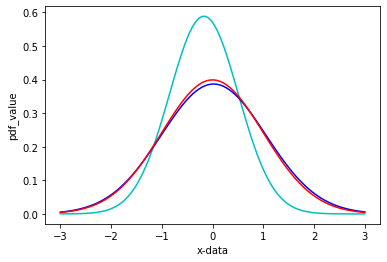

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

x = np.linspace(-3,3,100)

yes_pdf_values = stats.norm.pdf(x,loc=campaignMeanYes,scale=campaignStdYes)
no_pdf_values = stats.norm.pdf(x,loc=campaignMeanNo,scale=campaignStdNo)
true_pdf_values = stats.norm.pdf(x,loc=0,scale=1)

plt.plot(x,yes_pdf_values,'c')
plt.plot(x,no_pdf_values,'b')
plt.plot(x,true_pdf_values,'r')
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.show()

  تابع چگالی احتمال توزیع نرمال ویژگی pdays:

In [37]:
pdaysMeanYes = dataFrame[dataFrame['y'] == 'yes']['pdays'].mean()
pdaysStdYes = dataFrame[dataFrame['y'] == 'yes']['pdays'].std()
print("mean:", pdaysMeanYes)
print("std:" , pdaysStdYes)

mean: 0.2794478138946331
std: 1.1848475631466828


In [38]:
pdaysMeanNo = dataFrame[dataFrame['y'] == 'no']['pdays'].mean()
pdaysStdNo = dataFrame[dataFrame['y'] == 'no']['pdays'].std()
print("mean:", pdaysMeanNo)
print("std:" , pdaysStdNo)

mean: -0.03551315968244191
std: 0.9684470665689708


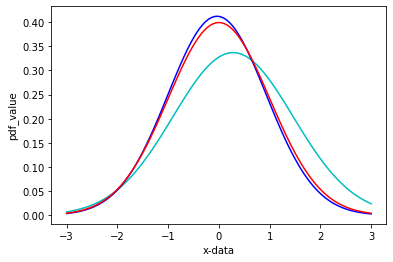

In [39]:

import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats

x = np.linspace(-3,3,100)

yes_pdf_values = stats.norm.pdf(x,loc=pdaysMeanYes,scale=pdaysStdYes)
no_pdf_values = stats.norm.pdf(x,loc=pdaysMeanNo,scale=pdaysStdNo)
true_pdf_values = stats.norm.pdf(x,loc=0,scale=1)

plt.plot(x,yes_pdf_values,'c')
plt.plot(x,no_pdf_values,'b')
plt.plot(x,true_pdf_values,'r')
plt.xlabel('x-data')
plt.ylabel('pdf_value')
plt.show()

  با مقایسه نمودارهای مربوط به تابع چگالی احتمال توزیع نرمال ویژگی های نست شده نتیجه می گیریم که ویژگی balance برای هر دو حالتی که "کاربر سپرده مدت‌دار را ثبت کرده یا نکرده" بیشنرین شباهت را با توزیع نرمال دارد و این ویژگی بهنرین انتحاب به عنوان ورودی مدل خواهد بود. 